#PCA
Στον PCA, πρώτα κεντράρουμε τα δεδομένα αφαιρώντας από κάθε feature τον μέσο όρο του. Στη συνέχεια υπολογίζουμε τον πίνακα συνδιακύμανσης. Πάνω σε αυτόν βρίσκουμε ιδιοτιμές και ιδιοδιανύσματα: τα ιδιοδιανύσματα είναι οι κύριες διευθύνσεις (principal components) και οι ιδιοτιμές δείχνουν πόση πληροφορία κρατάει η κάθε διεύθυνση. Τα ταξινομούμε από τη μεγαλύτερη ιδιοτιμή προς τη μικρότερη και κρατάμε τα πρώτα k (εδώ k=3), φτιάχνοντας τον projection matrix. Τέλος, προβάλλουμε τα κεντραρισμένα δεδομένα πάνω σε αυτές τις k διευθύνσεις και παίρνουμε ένα νέο dataset με λιγότερες διαστάσεις όπως φαίνεται και απο το αποτέλεσμα (13 dims -> 3 dims). Επιπλέον, υπολογίζεται και απεικονίζεται σε γράφημα το cumulative explained variance, το οποίο δείχνει το ποσοστό της συνολικής διασποράς που διατηρείται από τα πρώτα k principal components.

Mounted at /content/drive
data shape: (178, 13)
New data shape: (178, 3)


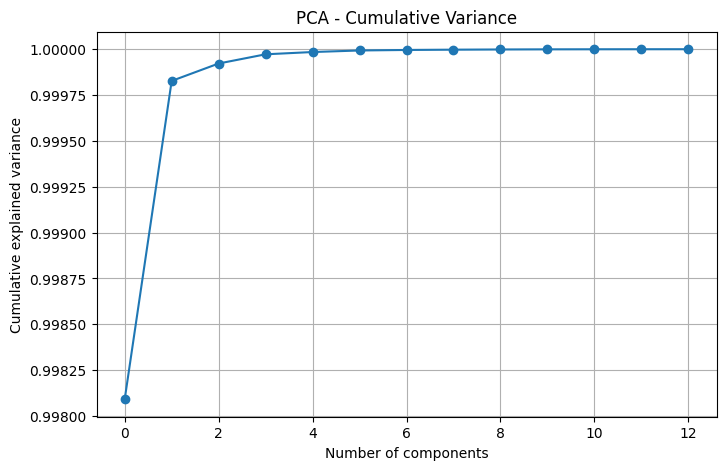

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from google.colab import drive
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file_path = '/content/drive/MyDrive/wine_dataset.csv'


class PCA:

    def __init__(self, k=3):
        self.k = k
        self.mean = None
        self.eig_val = None
        self.eig_vec = None
        self.var_ratio = None
        self.projection_Matrix = None

    def centerData(self, x):
        mean = np.mean(x, axis=0)
        x_hat = x - mean
        return x_hat

    def compute_Covariance_Matrix(self, x):
        N, D = x.shape
        S = np.dot(x.T, x)
        S *= (1/N)
        return S

    def compute_Projection_Matrix(self, eig_vec, k=3):
        return eig_vec[:, :k]

    def transform_data(self, projection_Matrix, centered_X):
        return np.dot(centered_X, projection_Matrix)


    def fit(self, X):
        self.centered_X = self.centerData(X)
        cov_Matrix = self.compute_Covariance_Matrix(self.centered_X)

        eig_val, eig_vec = np.linalg.eig(cov_Matrix)

        idx = np.argsort(eig_val)[::-1]
        self.eig_val = eig_val[idx]
        self.eig_vec = eig_vec[:, idx]

        self.var_ratio = self.eig_val / np.sum(self.eig_val)
        self.projection_Matrix = self.compute_Projection_Matrix(
            self.eig_vec, self.k
        )

        return self


    def transform(self, X):
        centered_X = self.centerData(X)
        return self.transform_data(self.projection_Matrix, centered_X)


    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


    def plot_variance(self):
        plt.figure(figsize=(8,5))
        plt.plot(np.cumsum(self.var_ratio), marker='o')
        plt.xlabel("Number of components")
        plt.ylabel("Cumulative explained variance")
        plt.title("PCA - Cumulative Variance")
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
  df = pd.read_csv(file_path)
  X = df.drop('target', axis=1).values

  print("data shape:", X.shape)

  pca = PCA(k=3)
  result = pca.fit_transform(X)

  print("New data shape:", result.shape)

  pca.plot_variance()
